In [2]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglogUKC import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretraining import LogLineEncoder, LogSeqEncoder, LogClassifier
# from oclog.openset.openset import OpenSet
from oclog.openset.opensetv4 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')

In [7]:
bglog = BGLog(save_padded_num_sequences=False, debug=True,  load_from_pkl=True, )
train_test = bglog.get_tensor_train_val_test(ablation=1000, designated_ukc_cls=5 )
train_data, val_data, test_data = train_test

ablation set to : 1000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltkukc.pkl
train_0:, 800
val_0:, 100
test_0:, 100
train_1:, 800
val_1:, 100
test_1:, 100
train_2:, 800
val_2:, 100
test_2:, 100
train_3:, 800
val_3:, 100
test_3:, 2
628 data in class 4 not enough to split into train:800 and validation:100, adding the entire data as ukc
class 5 is added as ukc
ukc_5:, 100
75 data in class 6 not enough to split into train:800 and validation:100, adding the entire data as ukc
train: 0    800
1    800
2    800
3    800
Name: label, dtype: int64
val: 0    100
1    100
2    100
3    100
Name: label, dtype: int64
test: 0    100
1    100
2    100
5    100
3      2
Name: label, dtype: int64
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]]
some example of labels:
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]]
<BatchDataset element_spec=(TensorSpec(shape=(32, 32

In [8]:
line_encoder = LogLineEncoder(bglog, chars_in_line=64)
logSeqencer =  LogSeqEncoder(line_in_seq=32)
ptmodel = LogClassifier(line_encoder=line_encoder, seq_encoder=logSeqencer, num_classes=4)
ptmodel.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
hist = ptmodel.fit(train_data, validation_data=val_data, epochs=7) 

vocab_size: 50
Epoch 1/7
100/100 [==============================] - 11s 99ms/step - loss: 0.3969 - accuracy: 0.8431 - precision: 0.9159 - recall: 0.7656 - val_loss: 0.0598 - val_accuracy: 0.9844 - val_precision: 0.9844 - val_recall: 0.9844
Epoch 2/7
100/100 [==============================] - 9s 95ms/step - loss: 0.0536 - accuracy: 0.9816 - precision: 0.9819 - recall: 0.9806 - val_loss: 0.0136 - val_accuracy: 0.9948 - val_precision: 0.9948 - val_recall: 0.9948
Epoch 3/7
100/100 [==============================] - 9s 95ms/step - loss: 0.0276 - accuracy: 0.9909 - precision: 0.9912 - recall: 0.9909 - val_loss: 0.0193 - val_accuracy: 0.9922 - val_precision: 0.9922 - val_recall: 0.9922
Epoch 4/7
100/100 [==============================] - 10s 95ms/step - loss: 0.0240 - accuracy: 0.9912 - precision: 0.9912 - recall: 0.9906 - val_loss: 0.0408 - val_accuracy: 0.9870 - val_precision: 0.9869 - val_recall: 0.9844
Epoch 5/7
100/100 [==============================] - 9s 95ms/step - loss: 0.0224 - accu

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 1/50, train_loss: 6.354880332946777, eval_score: 0.5851632957532267


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 2/50, train_loss: 6.35488224029541, eval_score: 0.7002837690798528


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


epoch: 3/50, train_loss: 6.354883193969727, eval_score: 0.8492319583204487


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 4/50, train_loss: 6.354881763458252, eval_score: 0.9063669682716295


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.29it/s]


epoch: 5/50, train_loss: 6.354881763458252, eval_score: 0.923383449665213


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


epoch: 6/50, train_loss: 6.3548808097839355, eval_score: 0.9335993636446449


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 7/50, train_loss: 6.3548808097839355, eval_score: 0.9394588460299907


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.40it/s]


epoch: 8/50, train_loss: 6.354881763458252, eval_score: 0.94605042769419


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 9/50, train_loss: 6.354881763458252, eval_score: 0.9491474198229736


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


epoch: 10/50, train_loss: 6.354884147644043, eval_score: 0.9507047112781295


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 11/50, train_loss: 6.3548808097839355, eval_score: 0.9512796492078689


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 12/50, train_loss: 6.35488224029541, eval_score: 0.9526086011328949


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.31it/s]


epoch: 13/50, train_loss: 6.354881763458252, eval_score: 0.9523421446982567


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


epoch: 14/50, train_loss: 6.3548808097839355, eval_score: 0.9526671154508891


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


epoch: 15/50, train_loss: 6.354881763458252, eval_score: 0.9531614663919195


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.32it/s]


epoch: 16/50, train_loss: 6.354882717132568, eval_score: 0.9536708812661895


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 17/50, train_loss: 6.354881763458252, eval_score: 0.9540339911736783


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.32it/s]


epoch: 18/50, train_loss: 6.3548808097839355, eval_score: 0.9537263607320478


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.27it/s]


epoch: 19/50, train_loss: 6.354880332946777, eval_score: 0.9540570208451615


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 20/50, train_loss: 6.35488224029541, eval_score: 0.9537497922022967


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 21/50, train_loss: 6.3548808097839355, eval_score: 0.9537497922022967


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 22/50, train_loss: 6.354881763458252, eval_score: 0.9540800190480593


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.25it/s]


epoch: 23/50, train_loss: 6.3548808097839355, eval_score: 0.9542488807789294


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.28it/s]


epoch: 24/50, train_loss: 6.35488224029541, eval_score: 0.9544175251845346


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 25/50, train_loss: 6.35488224029541, eval_score: 0.9544175251845346


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 26/50, train_loss: 6.35488224029541, eval_score: 0.9544175251845346


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 27/50, train_loss: 6.354882717132568, eval_score: 0.9544175251845346


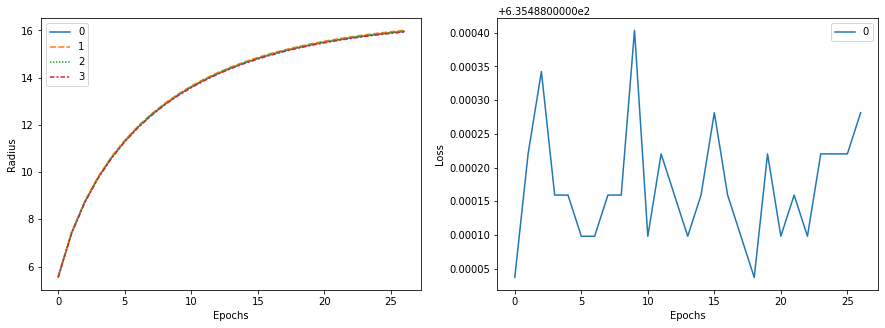

In [9]:
oset = OpenSet(4, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate=5, wait_patient=3,)

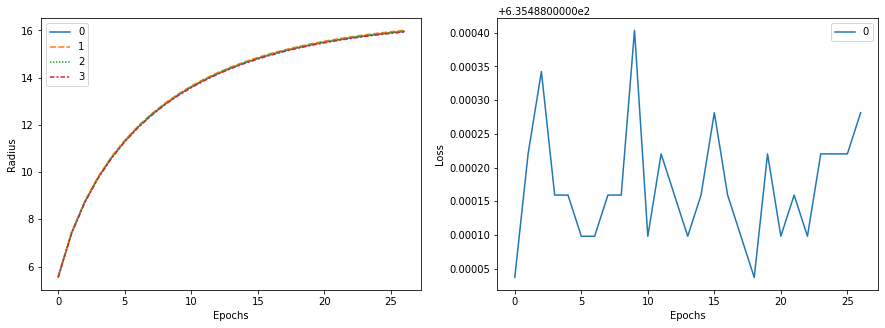

euc_dis: tf.Tensor(
[12.189906   3.2759547  2.4807613  4.294247  10.132407   2.626612
  7.363024  10.01574    8.858029   2.9459932  3.8439486  7.54988
  9.359566   3.2628522  9.0701685  4.6214166  8.254136   5.792221
  8.791621   3.9758594  3.0330956 12.918375   2.7309775  9.295115
  8.402879   3.6735997 10.201238   7.6575894  2.0568407  2.664681
 11.475287   8.435193 ], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[15.76011  15.735913 15.76011  15.805512 15.773236 15.735913 15.773236
 15.773236 15.773236 15.805512 15.735913 15.773236 15.773236 15.76011
 15.773236 15.735913 15.805512 15.76011  15.773236 15.735913 15.76011
 15.773236 15.805512 15.735913 15.805512 15.76011  15.773236 15.735913
 15.735913 15.805512 15.773236 15.773236], shape=(32,), dtype=float32)
predictions with ukc_label=999 [0 3 0 1 2 3 2 2 2 1 3 2 2 0 2 3 1 0 2 3 0 2 1 3 1 0 2 3 3 1 2 2]
[[800   0   0   0   0]
 [  9 638   0   0 153]
 [  0   0 776  14  10]
 [  0   2   0 740  58]
 [  0   0   0   0   0]]
92.31
f1

In [10]:
oset.plot_radius_chages()
preds = oset.openpredict(oset.features)
y_true, y_pred, _ = oset.evaluate(train_data, zero_div=0)

In [11]:
y_true, y_pred, _ = oset.evaluate(test_data, ukc_label=5)

[[96  0  0  0  0]
 [ 0  0  0  0 98]
 [ 0  0 93  0  0]
 [ 0  0  0  1  1]
 [67 15  0  0 13]]
52.86
f1_weighted: 0.46206178033623685, f1_macro: 0.5067166545427415, f1_micro: 0.5286458333333334, f_measure: {'Known': 60.1995, 'Open': 12.5604, 'F1-score': 50.6717}
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        96
           1       0.00      0.00      0.00        98
           2       1.00      1.00      1.00        93
           3       1.00      0.50      0.67         2
           5       0.12      0.14      0.13        95

    accuracy                           0.53       384
   macro avg       0.54      0.53      0.51       384
weighted avg       0.42      0.53      0.46       384

